### 캐클 데이터 주소

https://www.kaggle.com/lava18/google-play-store-apps

In [1]:
import pandas as pd                   ## 판다스 모듈을 사용한다, 

## 예제 11-2-1  구글 스토어 자료로 자료형을 변경하기

In [2]:
gstore = pd.read_csv('googleplaystore.csv')            ## csv 파일을 읽는다 

In [3]:
gstore.shape                                       ## 형상을 확인한다,

(10841, 13)

In [4]:
gstore.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
gstore.isna().sum()                      ## 결측값을 논리값으로 확인한다.
                                         ## 논리값은 True 일때는 1이므로 전부 더하면 결측값의 개수이다 

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [6]:
gstore = gstore.fillna(0)            ## 모든 결측값을 0으로 처리한다 

In [7]:
gstore.isna().sum().sum()            ## 다시 결측값을 확인하면 아무것도 없다 

0

In [8]:
gstore.get_dtype_counts()               ## 모든 자료형의 개수를 확인한다 

float64     1
object     12
dtype: int64

In [9]:
try : 
    gstore['Last Updated'] = pd.to_datetime(gstore['Last Updated'])        ## 날짜를 변경하려고 하니 잘 목쇤 값이 들어와있다 
except Exception as e :
    print(e)

day is out of range for month


In [10]:
gstore['Last Updated'] = pd.to_datetime(gstore['Last Updated'],  errors='coerce')    ## errors 매개변수를 이용해서 강제로 변경한다 

In [11]:
gstore['Installs'].str                               ## 문자열에 대한 변경은 str 객체를 사용한다 

In [12]:
gstore['Installs'] = gstore['Installs'].str.replace("+","")           ## 특정 문자를 변경할 때는 replace 함수를 사용한다,
                                                                      ## 순환문 없이 모든 값이 변환된다. 

In [13]:
gstore['Installs'] = gstore['Installs'].str.replace(",","")

In [14]:
gstore['Installs'] = gstore['Installs'].str.replace("Free","0")

In [15]:
gstore['Installs'] = gstore['Installs'].astype(int)                  ## 다 변환한 후에 자료형을 변경한다 

In [16]:
gstore['Installs'].value_counts().head()                            ## 변경된 값의 범주들의 개수를 확인한다 

1000000     1579
10000000    1252
100000      1169
10000       1054
1000         907
Name: Installs, dtype: int64

In [17]:
gstore.get_dtype_counts()                             ## 자료형에 대한 개수를 확인한다 

float64            1
object            10
datetime64[ns]     1
int64              1
dtype: int64

In [18]:
gstore['Price'] = gstore['Price'].str.replace("Free","0")           ##  가격에 대해서드 문자열 내의 값을 변환한다 

In [19]:
gstore['Price'] = gstore['Price'].str.replace("$","")

In [20]:
gstore['Price'] = gstore['Price'].str.replace("Everyone","0")

In [21]:
gstore['Price'] = gstore['Price'].astype(float)                    ## 실수형으로 변환한다 

In [22]:
gstore['Price'].value_counts().sum()

10841

In [23]:
gstore.get_dtype_counts()                                ## 열에 대한 자료형을 확인한다 

datetime64[ns]    1
float64           2
int64             1
object            9
dtype: int64

In [24]:
gstore['Size'] = gstore['Size'].str.replace("M","000")              ## 크기에 대해서도 문자열을 숫자형으로 변환이 가능하도록 변경한다 

In [25]:
gstore['Size'] = gstore['Size'].str.replace("Varies with device","0")

In [26]:
gstore['Size'] = gstore['Size'].str.replace('k',"")

In [27]:
gstore['Size'] = gstore['Size'].str.replace('+',"")

In [28]:
gstore['Size'] = gstore['Size'].str.replace(',',"")

In [29]:
gstore['Size'] = gstore['Size'].astype(float)

In [30]:
gstore['Size'].value_counts().sum()

10841

In [31]:
%matplotlib inline

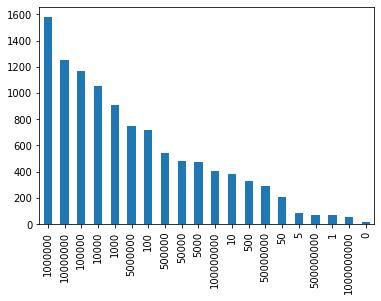

In [32]:
gstore['Installs'].value_counts().plot.bar()                          ## 숮자형으로 변겨된 열을 막대그래프를 그려서 시각화한다 

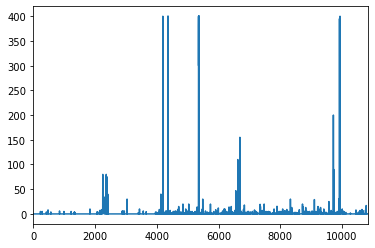

In [33]:
gstore['Price'].plot.line()                               ## 숮자형으로 변겨된 열을 선그래프를 그려서 시각화한다 